# Generating Bollywood song lyrics using Natural Language Processing

## Import libraries

In [1]:
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split

## Read lyrics from file

In [2]:
file_name = '/content/bollywood_song_lyrics.txt'
data = open(file_name).read()
corpus = data.lower().split("\n")

## Preprocess

Initialize tokenizer

In [6]:
input_sequences = []
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)

Total number of unique words present in lyrics corpus

In [7]:
total_words = len(tokenizer.word_index) + 1
print(total_words)

6005


For each line in corpus, tokenize the words, create a n-gram and add to input_sequences

In [ ]:
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

Find the longest sequence of words

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)

Pad with zero to match the max sequence length

In [ ]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

248


Create predictors and labels

In [ ]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

Split training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, label, test_size=0.2, random_state=42)

## Model




### Create the Model

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(LSTM(64))
model.add(Dense(total_words/2, activation='relu'))
model.add(Dense(total_words, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 247, 64)           384320    
_________________________________________________________________
bidirectional (Bidirectional (None, 247, 256)          197632    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense (Dense)                (None, 3002)              195130    
_________________________________________________________________
dense_1 (Dense)              (None, 6005)              18033015  
Total params: 18,892,273
Trainable params: 18,892,273
Non-trainable params: 0
_________________________________________________________________
None


### Compile the Model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the Model

In [ ]:
 history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
763/763 [==============================] - 117s 154ms/step - loss: 6.9802 - accuracy: 0.0383 - val_loss: 6.7845 - val_accuracy: 0.0392
Epoch 2/100
763/763 [==============================] - 116s 152ms/step - loss: 6.4965 - accuracy: 0.0464 - val_loss: 6.4604 - val_accuracy: 0.0543
Epoch 3/100
763/763 [==============================] - 116s 152ms/step - loss: 6.0162 - accuracy: 0.0640 - val_loss: 6.2145 - val_accuracy: 0.0618
Epoch 4/100
763/763 [==============================] - 116s 152ms/step - loss: 5.5848 - accuracy: 0.0892 - val_loss: 5.9984 - val_accuracy: 0.0956
Epoch 5/100
763/763 [==============================] - 116s 152ms/step - loss: 5.1069 - accuracy: 0.1298 - val_loss: 5.7715 - val_accuracy: 0.1366
Epoch 6/100
763/763 [==============================] - 116s 152ms/step - loss: 4.6035 - accuracy: 0.1845 - val_loss: 5.6117 - val_accuracy: 0.1826
Epoch 7/100
763/763 [==============================] - 116s 152ms/step - loss: 4.1065 - accuracy: 0.2401 - val_loss: 5

### Save Model

In [ ]:
model.save_weights('/content/drive/My Drive/Colab Notebooks/bolly_lyrics_model.h5')

## Plot Accuracy and Loss curve

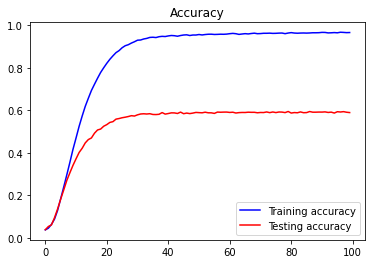

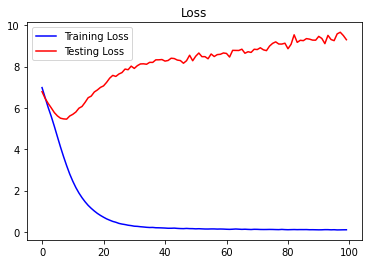

<Figure size 432x288 with 0 Axes>

In [ ]:
A%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Testing accuracy')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Testing Loss')
plt.title('Loss')
plt.legend()
plt.figure()

plt.show()

## Generate Lyrics

In [ ]:
seed_text = "tere zindagi ka"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

tere zindagi ka ghuraana dekha poori duniya ka gol gol agan hain prem kahani mein ek ladka hota hai ek ladki hoti hai kabhi dono hanste hain kabhi dono rote hain prem kahani
